# 19M18850 Ong Yuh Chian (yuhchian)

In [1]:
# To remove MatplotlibDeprecationWarning: The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
# if not cb.iterable(width):
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
G1 = nx.complete_graph(6) # K6
G2 = nx.Graph() # K3,3
G2.add_nodes_from(range(0,5))
G2.add_edges_from([(0,3),(0,4),(0,5),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)])
n1 = nx.number_of_nodes(G1)
m1 = nx.number_of_edges(G1)
n2 = nx.number_of_nodes(G2)
m2 = nx.number_of_edges(G2)

plt.subplot(121)
nx.draw_circular(G1, node_size=400, node_color='red', with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_circular(G2, node_size=400, node_color='red', with_labels=True, font_weight='bold')

## Question 1: Write down the formulas of average degree and density of graph G=(V,E) (|V|=n, |E|=m).

Degree of any vertex $v_i$ within Graph G = $k_i = \sum\limits_{j=1}^{n} A_{ij}$

Sum of all degrees within Graph G = $\sum\limits_{i=1}^{n} k_i$ = $\sum\limits_{i=1}^{n}\sum\limits_{j=1}^{n} A_{ij}$ = 2m , i.e. twice of the number of all edges.

Average degree of Graph $G = c = \frac{1}{n}\sum\limits_{i=1}^{n}k_i = \frac{2m}{n}$, i.e. twice the number of all edges divided by number of vertices.

Density of Graph G = $\rho = \frac{2m}{n(n-1)} = \frac{c}{n-1}$ which is approximately equal to $\frac{c}{n}$ if the network is large.

## Question 2: Make a program of computing average degree, density, and $L_3$ of $K_6$ and $K_{3,3}$ . Show the code and its results.

$L_r$ refers to number of paths of length r that start and end at the same vertex. 

$L_r$ = $\sum\limits_{i=1}^{n}{}[ \,A^r ] \,_{ij} = TrA^r$ . 

$L_3$ are basically triangles, thus we can obtain $L_3$ by simply obtaining the number of triangles divided by 3. 

In [8]:
# Program to compute average degree, density, L_3 of any graph G
def graph_details(G):
    n = len(G.nodes())
    m = len(G.edges())
    avg_deg = 2 * m / n
    density = 2 * m / n / (n - 1)
    print(nx.triangles(G))
    L3 = sum(nx.triangles(G).values()) * 2    # because paths can occur in either directions
    return (avg_deg, density, L3)

print("The average degree in Graph K_6 is %.3f, its density is %.3f, and the number of L_3 cycles in K_6 is %d." % graph_details(G1))

print("The average degree in Graph K_3_3 is %.3f, its density is %.3f, and the number of L_3 cycles in K_3_3 is %d." % graph_details(G2))

{0: 10, 1: 10, 2: 10, 3: 10, 4: 10, 5: 10}
The average degree in Graph K_6 is 5.000, its density is 1.000, and the number of L_3 cycles in K_6 is 120.
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
The average degree in Graph K_3_3 is 3.000, its density is 0.600, and the number of L_3 cycles in K_3_3 is 0.


Worthy of mention is that $K_{3,3}$ has no $L_3$ cycles, which is true because of its bipartite nature. 

## Question 3: Is K_6 planar? Why?

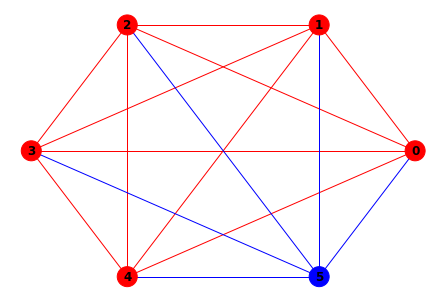

In [4]:
nx.draw_circular(G1, node_size=400, node_color=(['red', 'red', 'red', 'red', 'red', 'blue']), edge_color=['red', 'red', 'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue'], with_labels=True, font_weight='bold')

No, K_6 cannot possibly be a planar. As defined, any network comprising $K_5$ or Utility Graph (UG) cannot be planar. Noting that any complete graph with 5 nodes or more will definitely be comprised of at least one $K_5$, none of them can possibly be planar -- See above plot of denoting the $K_5$ within the $K_6$in red.

## Question 4: Is K_3_3 planar? Why?

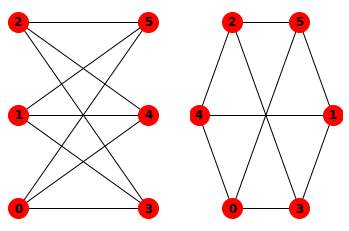

In [5]:
plt.subplot(121)
top = nx.bipartite.sets(G2)[0]
pos = nx.bipartite_layout(G2, top)
nx.draw(G2, pos=pos, node_size=400, node_color='red', with_labels=True, font_weight='bold')
plt.subplot(122)
pos[1] = [2, 0]
pos[4] = [-2, 0]
nx.draw(G2, pos=pos, node_size=400, node_color='red', with_labels=True, font_weight='bold')

No, $K_{3,3}$ cannot be planar. As can be seen from the above two diagrams, by switching the positions of nodes 1 and 4, it is immediately obvious that it is identical to the shape of the Utility Graph (UG) given to us in the lecture, which implies non-planarity. 